In [3]:
%%bash
video1=/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Training/videos/v_ApplyEyeMakeup_g01_c01.avi
video2=/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Validation/videos/video_validation_0000006.mp4
#time ../../Shotdetect/build/shotdetect-cmd -i $video2 -a second -o shotScenes -s 60 -v -f -l -m -r 2> /dev/null
time ../../Shotdetect/build/shotdetect-cmd -i $video2 -a third -o shotScenes -s 60 2> shotError.txt

Process is terminated.


In [4]:
import os, subprocess, pickle
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def findSceneTrans(videoName, threshold):
    """
    Given a video, returns a list of frame numbers which are the starting frame of the transition
    between scenes.
    """
    
    #Returns the duration of the video in seconds.
    if not os.path.exists(videoName):
        print '%s does not exist!' % videoName
        return False
    shotdetect = '/afs/cs.stanford.edu/u/anenberg/scr/Shotdetect/build/shotdetect-cmd'
    p = subprocess.Popen([shotdetect, '-i', videoName, '-a', 'FOO', '-o', 'shot_FOO', '-s', str(threshold)], stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    out, err = p.communicate()
    output = err.split()
    frameList = []
    for i in xrange(len(output)):
        if output[i]=='frame::':
            frameList.append(int(output[i+1]))
    return frameList


video2="/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Validation/videos/video_validation_0000006.mp4"
frameList = findSceneTrans(video2,99)




im_path = "/afs/cs.stanford.edu/u/anenberg/scr/CS231N/data/allFrames/train/video_validation_0000006/"
videopkl="/afs/cs.stanford.edu/u/anenberg/scr/CS231N/data/allFrames/train/video_validation_0000006/time_stamp_map.pkl"
frameMap = pickle.load( open(videopkl, "rb"))



#for i in frameList:
#    img = mping
#img=mpimg.imread('stinkbug.png')

# To visualize some nice transition frames,run the following code. We can save the frames to show how the segmentaion is able to identify the transitions in the video.



In [42]:
from IPython import display
def printIm(im_path, frameNum):
    num = '%08d.jpg'%frameNum
    frame_path = im_path+num
    img = mpimg.imread(frame_path)
    plt.imshow(img)
    plt.imshow(img, origin="lower")
    plt.gca().axis('off')
    plt.gcf().set_size_inches((2, 2))
    plt.show()

In [57]:
import os
sceneTransitionDir = "/afs/cs.stanford.edu/u/anenberg/scr/CS231N/data/allFrames/sceneTransitions/"
testVideo = "video_test_0000251.pkl"
pickledList = os.path.join(sceneTransitionDir,testVideo)
frameList = pickle.load( open(pickledList, "rb" ) )

videoPath = "/afs/cs.stanford.edu/u/anenberg/scr/CS231N/data/allFrames/test/video_test_0000251/"
frameMap = pickle.load( open(os.path.join(videoPath, "time_stamp_map.pkl"), "rb"))

In [65]:
frame_with_length = []
end =max(frameMap.keys())
for i in reversed(frameList):
    frame_with_length.append((i,abs(end-i)))
    end = i

#reverse sort the list of frames by the length of their segment.
frames_sorted = sorted(frame_with_length,key=lambda x: x[1], reverse=True)    

for i, length in frames_sorted:
    print "frame: " + str(i)+", length: "+ str(length)
    printIm(videoPath,i)
    display.clear_output(wait=True)
    while True:
        response = raw_input("Press enter to continue: ")
        if not response:
            break
            

Press enter to continue: 


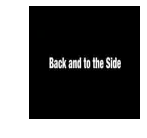

In [75]:
#GOOD 2352, using(2560, 2561, 25681)
#2760,
#2148

printIm(videoPath,2760)

In [29]:
testVideoList

[4,
 6,
 58,
 148,
 302,
 668,
 1012,
 1196,
 1330,
 1659,
 1773,
 1843,
 1899,
 1962,
 2035,
 2083,
 2359,
 2664,
 2925,
 3007,
 3009]

In [8]:
import matplotlib

In [12]:
from matplotlib.pyplot import imread, imshow

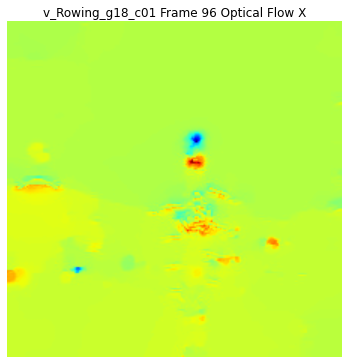

In [37]:
im = '/afs/cs.stanford.edu/u/anenberg/scr/CS231N/data/optical_flow/stack_1_offset_30/1/v_Rowing_g18_c01_00000096dY.jpg'
fig1 = plt.figure(facecolor='white', figsize= (6,6))
ax1 = plt.axes(frameon=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
plt.title('v_Rowing_g18_c01 Frame 96 Optical Flow X')
ax1.imshow(imread(im))

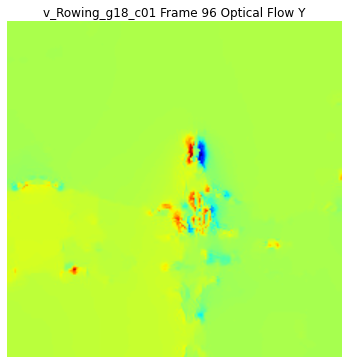

In [38]:
im = '/afs/cs.stanford.edu/u/anenberg/scr/CS231N/data/optical_flow/stack_1_offset_30/1/v_Rowing_g18_c01_00000096dX.jpg'
fig1 = plt.figure(facecolor='white', figsize= (6,6))
ax1 = plt.axes(frameon=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
plt.title('v_Rowing_g18_c01 Frame 96 Optical Flow Y')
ax1.imshow(imread(im))

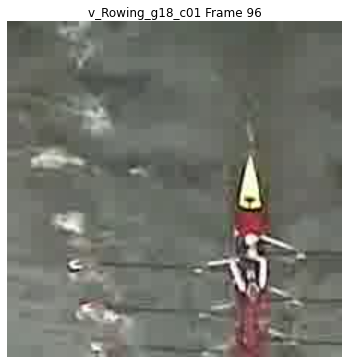

In [39]:
im = '/afs/cs.stanford.edu/u/anenberg/scr/CS231N/data/allFrames/train/v_Rowing_g18_c01/00000096.jpg'
fig1 = plt.figure(facecolor='white', figsize= (6,6))
ax1 = plt.axes(frameon=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
plt.title('v_Rowing_g18_c01 Frame 96')
ax1.imshow(imread(im))

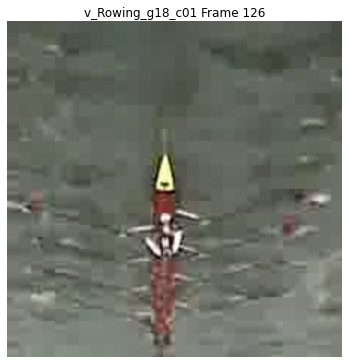

In [40]:
im = '/afs/cs.stanford.edu/u/anenberg/scr/CS231N/data/allFrames/train/v_Rowing_g18_c01/00000126.jpg'
fig1 = plt.figure(facecolor='white', figsize= (6,6))
ax1 = plt.axes(frameon=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
plt.title('v_Rowing_g18_c01 Frame 126')
ax1.imshow(imread(im))

In [41]:
ls ../examples/shot_detect_5/snapshots/

avconv.py               makeUCF101_class_index_map.py  opticalFlow_samedX.jpg
avconv.pyc              OpenCV/                        opticalFlow_samedY.jpg
computeOpticalFlow.py   opticalFlow2dX.jpg             quickScript.sh*
consolidateLists.py     opticalFlow2dY.jpg             README.md
executeOpticalFlow.sh*  opticalflow_dX.jpg             ShotDetection.ipynb
extractFrames.py        opticalFlowdX.jpg              shotDetection.py
Frames_from_UCF.ipynb   opticalflow_dY.jpg             shotError.txt
framesFromVid.py        opticalFlowdY.jpg              shot_FOO/
makeNameIndexMap.py     OpticalFlow.ipynb              Untitled.ipynb
